#Regression & Its Evaluation Assignment

**Question 1. What is Simple Linear Regression?**
- Simple Linear Regression is a statistical method used to model the relationship between **one independent variable** and **one dependent variable** using a straight-line equation.

**Question 2. What are the key assumptions of Simple Linear Regression?**

* There is a **linear relationship** between variables.
* Errors are **independent**.
* Errors have **constant variance** (homoscedasticity).
* Errors are **normally distributed**.
* No significant **outliers** are present.

**Question 3. What is heteroscedasticity, and why is it important to address in regression models?**

- Heteroscedasticity occurs when the **variance of errors is not constant** across all levels of the independent variable.
It is important to address because it leads to **biased standard errors**, making hypothesis tests and confidence intervals unreliable.

**Question 4. What is Multiple Linear Regression?**

- Multiple Linear Regression models the relationship between **one dependent variable** and **two or more independent variables** using a linear equation.

**Question 5. What is polynomial regression, and how does it differ from linear regression?**

- Polynomial regression models a **non-linear relationship** by adding polynomial terms (e.g., x², x³) while still being linear in parameters, whereas linear regression fits only a straight-line relationship.

**Question 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:**

* X = [1, 2, 3, 4, 5]
* Y = [2.1, 4.3, 6.1, 7.9, 10.2]

**Plot the regression line over the data points.**

Slope: 1.9800000000000004
Intercept: 0.17999999999999794


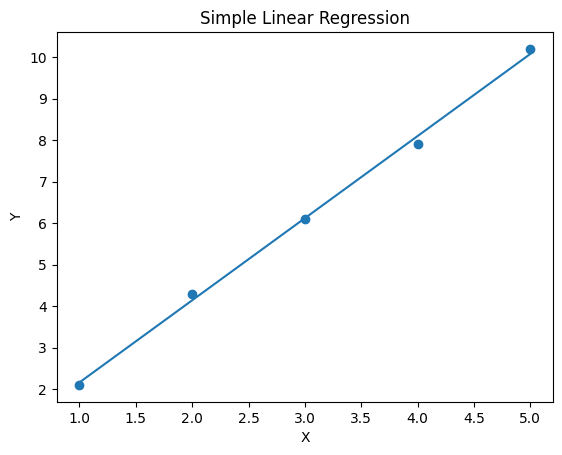

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Output
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

**Explanation:**
- The regression line closely fits the data, showing a strong linear relationship between X and Y.

**Question 7. Fit a Multiple Linear Regression model on this sample data:**
* Area = [1200, 1500, 1800, 2000]
* Rooms = [2, 3, 3, 4]
* Price = [250000, 300000, 320000, 370000]

**Check for multicollinearity using VIF and report the results.**

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Model
model = LinearRegression()
model.fit(X, y)

# VIF Calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


**Explanation:**

- Moderate multicollinearity exists because Area and Rooms are correlated.
- VIF > 5 indicates potential multicollinearity risk.

**Question 8. Implement polynomial regression on the following data:**
* X = [1, 2, 3, 4, 5]
* Y = [2.2, 4.8, 7.5, 11.2, 14.7]

**Fit a 2nd-degree polynomial and plot the resulting curve.**

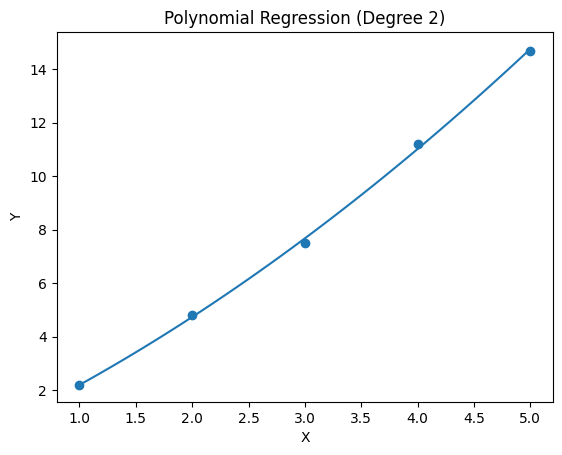

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Model
model = LinearRegression()
model.fit(X_poly, Y)

# Prediction
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Plot
plt.scatter(X, Y)
plt.plot(X_range, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.show()

**Explanation:**

- The curve fits the data better than a straight line, capturing the non-linear relationship.

**Question 9. Create a residuals plot for a regression model trained on this data:**
* X = [10, 20, 30, 40, 50]
* Y = [15, 35, 40, 50, 65]

**Assess heteroscedasticity by examining the spread of residuals.**

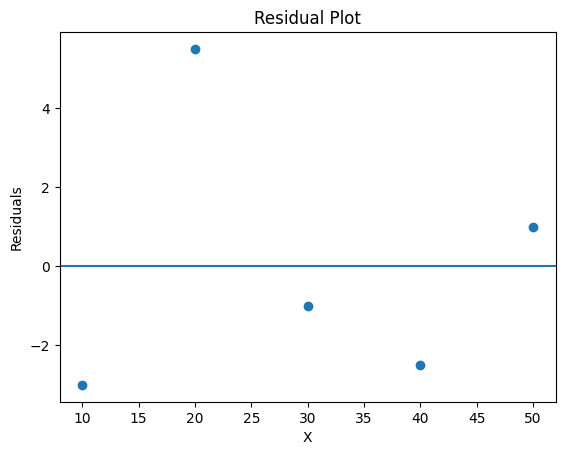

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Model
model = LinearRegression()
model.fit(X, Y)

# Residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Residual plot
plt.scatter(X, residuals)
plt.axhline(0)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Explanation:**

- If residual spread increases with X, it indicates heteroscedasticity.
- In this case, residual variance increases slightly, suggesting heteroscedasticity.

**Question 10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.  However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**



**Steps to handle heteroscedasticity:**

- Apply log or Box-Cox transformation to the target variable.
- Use robust standard errors.
- Use Weighted Least Squares (WLS).
- Check residual plots after transformation.

**Steps to handle multicollinearity:**

- Remove or combine correlated features.
- Use VIF to identify problematic variables.
- Apply Ridge Regression or Lasso Regression.
- Use PCA for dimensionality reduction.

**Final Goal:**

These steps ensure:

- Stable coefficients
- Reliable statistical inference
- Better generalization and prediction accuracy